In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import seaborn as sns
import seaborn as sb
from config import gkey

gmaps.configure(api_key=gkey)



In [25]:
for_plotting = pd.read_csv ('Fire.csv')
for_plotting
#Group inconsistent battallion names into one single integer battallion
for_plotting=for_plotting.replace({
    "2B":"2",
    "2C":"2",
    "3C":"3",
    "4C":"4",
    "5B":"5",
    "6A":"6",
    "7A":"7",
    "7B":"7",
    "7B`":"7",
    "8B":"8",
    "8C":"8",
    "9A":"9",
    "9C":"9"   
})
for_plotting

for_plotting.to_csv(r'Fire.csv', index = False)

In [3]:
for_plotting['BATTALION'].count()
#average percentloss by batallion
avg_loss_by_battalion=for_plotting.groupby(['BATTALION']).mean()['PERCENTAGE LOSS']
avg_loss_by_battalion

BATTALION
1    14.047705
2     4.122373
3    10.243651
4     6.423684
5    13.121111
6    11.848267
7    11.857234
8    13.867857
9    14.656667
Name: PERCENTAGE LOSS, dtype: float64

['1' '2' '3' '4' '5' '6' '7' '8' '9']


Text(0.5, 1.0, 'Average % Value Loss in Fires by Battalion')

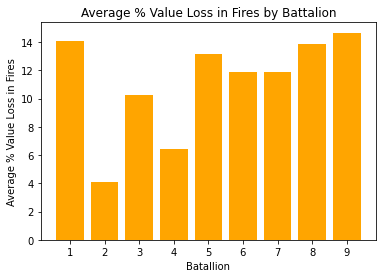

In [4]:
unique_battalion=for_plotting['BATTALION'].unique()
unique_battalion.sort()
print(unique_battalion)

# plot avg. loss by battalion on scatter plot

x_axis=unique_battalion
y_axis=avg_loss_by_battalion
plt.bar(x_axis,y_axis,color=['orange'])

plt.xlabel("Batallion")
plt.ylabel("Average % Value Loss in Fires")
plt.title("Average % Value Loss in Fires by Battalion")






In [5]:
lat_for_map=for_plotting['Lat'].astype(float)
lat_for_map.astype(float)

lng_for_map=for_plotting['Lng'].astype(float)
lng_for_map.astype(float)




0     -96.814783
1     -96.857108
2     -96.824020
3     -96.764435
4     -96.908816
         ...    
616   -96.694285
617   -96.765385
618   -96.726209
619   -96.567056
620   -96.802091
Name: Lng, Length: 621, dtype: float64

In [19]:
#HEATMAP

# Store 'Lat' and 'Lng' into  locations 
coordinates = for_plotting[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
percentage_value_lost = for_plotting["PERCENTAGE LOSS"].astype(float)/100

In [24]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(coordinates, weights=percentage_value_lost,
                                 dissipating=False, max_intensity=3.5, point_radius=0.02)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))